In [1]:
 #libraries used to extract, clean and manipulate the data
 from helpers import *
 import pandas as pd 
 import numpy as np
 import string

#To plot the graphs
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#library used to count the frequency of words
from sklearn.feature_extraction.text import CountVectorizer

#To create the sentiment analysis model, tokenization and lemmatization
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data
#nltk.download('vader_lexicon')
#nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Extracting the information of the 50 most popular songs of Metallica using function created on helpers script
access_token = 'XqAqanYBZlLUFjxnhUk2Vf7WISWfYH0U56pcvUGflD8zaxrtaRp1p-OlvadM0vtH'
df0 = search_data('Metallica',50,access_token)

Searching for songs by Metallica...

Song 1: "Nothing Else Matters"
Song 2: "One"
Song 3: "Enter Sandman"
Song 4: "Master of Puppets"
Song 5: "The Unforgiven"
Song 6: "Fade to Black"
Song 7: "For Whom the Bell Tolls"
Song 8: "Sad But True"
Song 9: "Welcome Home (Sanitarium)"
Song 10: "Creeping Death"
Song 11: "Wherever I May Roam"
Song 12: "...And Justice for All"
Song 13: "Battery"
Song 14: "Atlas, Rise!"
Song 15: "Blackened"
Song 16: "The Unforgiven II"
Song 17: "Turn the Page"
Song 18: "Seek & Destroy"
Song 19: "The Four Horsemen"
Song 20: "Ride the Lightning"
Song 21: "The Day That Never Comes"
Song 22: "The Unforgiven III"
Song 23: "Hardwired"
Song 24: "Fuel"
Song 25: "Disposable Heroes"
Song 26: "To Live Is to Die"
Song 27: "Dyers Eve"
Song 28: "Harvester of Sorrow"
Song 29: "Whiskey in the Jar"
Song 30: "Moth Into Flame"
Song 31: "St. Anger"
Song 32: "The Thing That Should Not Be"
Song 33: "Now That We’re Dead"
Couldn't find the lyrics section.
Song 34: "Orion"
Song 35: "Whiplas

In [3]:
df0.head(10)

,artist,title,album,date,lyric
0,Metallica,Nothing Else Matters,Metallica,1991-08-12,[Guitar Intro]\n\n[Verse 1]\nSo close no matte...
1,Metallica,One,...And Justice for All,1989-08-25,[Instrumental Intro]\n\n[Verse 1]\nI can't rem...
2,Metallica,Enter Sandman,Metallica,1991-08-12,[Instrumental Intro]\n\n[Verse 1]\nSay your pr...
3,Metallica,Master of Puppets,Master of Puppets,1986-03-03,"[Verse 1]\nEnd of passion play, crumbling away..."
4,Metallica,The Unforgiven,Metallica,1991-10-28,[Verse 1]\nNew blood joins this Earth and quic...
5,Metallica,Fade to Black,Ride the Lightning,1984-07-27,"[Verse 1]\nLife, it seems, will fade away\nDri..."
6,Metallica,For Whom the Bell Tolls,Ride the Lightning,1984-07-27,[Instrumental Intro]\n\n[Verse 1]\nMake his fi...
7,Metallica,Sad But True,Metallica,1991-08-12,"[Verse 1]\nHey (Hey), I'm your life, I'm the o..."
8,Metallica,Welcome Home (Sanitarium),Master of Puppets,1986-03-03,[Instrumental Intro]\n\n[Verse 1]\nWelcome to ...
9,Metallica,Creeping Death,Ride the Lightning,1984-07-27,"[Verse 1]\nSlaves, Hebrews born to serve\nTo t..."


In [4]:
#cleaning and transforming the data using functions created on helpers script
df = clean_lyrics(df0,'lyric')
df = create_decades(df)

#Filter  data to use songs that have lyrics.
df = df[df['lyric'].notnull()]


#Save the data into a csv file
df.to_csv('lyrics.csv',index=False)

In [5]:
df.head(10)

,artist,title,album,decade,year,date,lyric
0,Metallica,Nothing Else Matters,Metallica,90s,1991,1991-08-12,so close no matter how far couldn't be much mo...
1,Metallica,One,...And Justice for All,80s,1989,1989-08-25,i can't remember anything can't tell if this i...
2,Metallica,Enter Sandman,Metallica,90s,1991,1991-08-12,say your prayers little one don't forget my so...
3,Metallica,Master of Puppets,Master of Puppets,80s,1986,1986-03-03,end of passion play crumbling away i'm your so...
4,Metallica,The Unforgiven,Metallica,90s,1991,1991-10-28,new blood joins this earth and quickly he's su...
5,Metallica,Fade to Black,Ride the Lightning,80s,1984,1984-07-27,life it seems will fade away drifting further ...
6,Metallica,For Whom the Bell Tolls,Ride the Lightning,80s,1984,1984-07-27,make his fight on the hill in the early day co...
7,Metallica,Sad But True,Metallica,90s,1991,1991-08-12,hey hey i'm your life i'm the one who takes yo...
8,Metallica,Welcome Home (Sanitarium),Master of Puppets,80s,1986,1986-03-03,welcome to where time stands still no one leav...
9,Metallica,Creeping Death,Ride the Lightning,80s,1984,1984-07-27,slaves hebrews born to serve to the pharaoh he...


In [6]:
def unique(list1): 
     # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    
    return unique_list

In [7]:
#Stores unique words of each lyrics song into a new column called words 

#list used to store the words
words = []
#iterate trought each lyric and split unique words appending the result into the words list
df = df.reset_index(drop=True)
for word in df['lyric'].tolist():
    words.append(unique(lyrics_to_words(word).split()))

#create the new column with the information of words lists 
df['words'] = words

In [8]:
df.head()

,artist,title,album,decade,year,date,lyric,words
0,Metallica,Nothing Else Matters,Metallica,90s,1991,1991-08-12,so close no matter how far couldn't be much mo...,"[close, matter, far, much, heart, forever, tru..."
1,Metallica,One,...And Justice for All,80s,1989,1989-08-25,i can't remember anything can't tell if this i...,"[cant, remember, anything, tell, true, dream, ..."
2,Metallica,Enter Sandman,Metallica,90s,1991,1991-08-12,say your prayers little one don't forget my so...,"[say, prayer, little, one, forget, son, includ..."
3,Metallica,Master of Puppets,Master of Puppets,80s,1986,1986-03-03,end of passion play crumbling away i'm your so...,"[end, passion, play, crumbling, away, im, sour..."
4,Metallica,The Unforgiven,Metallica,90s,1991,1991-10-28,new blood joins this earth and quickly he's su...,"[new, blood, join, earth, quickly, he, subdued..."


In [9]:
#Create a new dataframe of all the  words used in lyrics and its decades 

#list used to store the information
set_words = []
set_decades = []

#Iterate trought each word and decade and stores them into the new lists
for i in df.index:
    for word in df['words'].iloc[i]:
        set_words.append(word)
        set_decades.append(df['decade'].iloc[i])

#create the new data frame  with the information of words and decade lists 
words_df = pd.DataFrame({'words':set_words,'decade':set_decades})

In [10]:
#Defined  your own Stopwords in case the clean data function does not remove all of them
stop_words = ['verse','im','get','1000','58','60','80','youre','youve',
               'guitar','solo','instrumental','intro','pre',"3","yo","yeah"]

# count the frequency of each word that don't have on the stop_words lists          
cv = CountVectorizer(stop_words=stop_words)

#Create a dataframe called data_cv to store the the number of times the word was used in  a lyric based their decades
text_cv = cv.fit_transform(words_df['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['decade'] = words_df['decade']

#created a dataframe that Sums the ocurrence frequency of each word and group the result by decade
vect_words = data_cv.groupby('decade').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

#Save the data into a csv file
vect_words.to_csv('words.csv',index=False)

#change the order of columns to order from the oldest to actual decade
vect_words = vect_words[['words','80s','90s','00s','10s']]

In [11]:
vect_words

,words,80s,90s,00s,10s
0,abide,0,0,0,1
1,absolute,1,0,0,0
2,absolutely,0,1,0,0
3,absolution,0,0,0,1
4,absurd,1,0,0,0
...,...,...,...,...,...
1592,year,2,1,0,0
1593,yes,1,3,0,0
1594,yesterday,1,0,0,1
1595,young,1,2,0,0


In [12]:
def plot_wordcloud(df,row,col):
    wc = WordCloud( background_color="white",colormap="Dark2",max_font_size=100,random_state=15)

    fig = plt.figure(figsize=(20,10))
    
    for index, value in enumerate(df.columns[1:]):

        top_dict = dict(zip(df['words'].tolist(),df[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15) 

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

def words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_news = []
    years = []
    for value in df.columns[1:]:
         unique_words.append(np.count_nonzero(df[value]))
         total_words.append(sum(df[value]))
         years.append(str(value))
         total_news.append(main_df['decade'][main_df['decade']==value].count())
    
    data = pd.DataFrame({'decade':years,'unique words':unique_words,'total words':total_words,'total songs':total_news})
    data['words per songs'] = round(data['total words'] / data['total songs'],0)
    data['words per songs'] = data['words per songs'].astype('int')
    return data

def plot_freq_words(df,decade,n_words):
    
    top_words_2020 = df.sort_values([decade],ascending=False).head(n_words)

    fig = plt.figure(figsize=(15,8))
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[1]])
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[2]])
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[3]])
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[4]])

    plt.legend(df.columns[1:].tolist())
    plt.title(f"Most frequent words in {decade} compared with other decades",fontsize=14)
    plt.xlabel(f'Most Frequent Words of {decade}',fontsize=12)
    plt.ylabel('Frecuency',fontsize=12)
    plt.xticks(fontsize=12,rotation=20)
    plt.yticks(fontsize=12)
    plt.savefig("lineplot.png",format="png", bbox_inches='tight')
    plt.show()

In [13]:
words_stats(vect_words,df)

,decade,unique words,total words,total songs,words per songs
0,80s,1011,1623,23,71
1,90s,685,1053,17,62
2,00s,146,158,3,53
3,10s,323,376,6,63


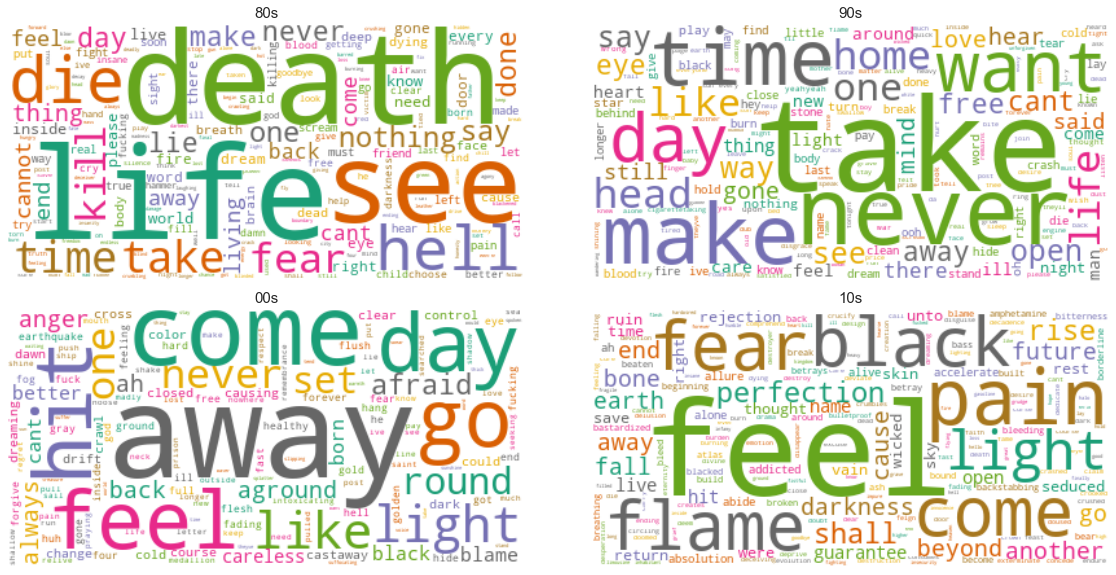

In [14]:
plot_wordcloud(vect_words,2,2)

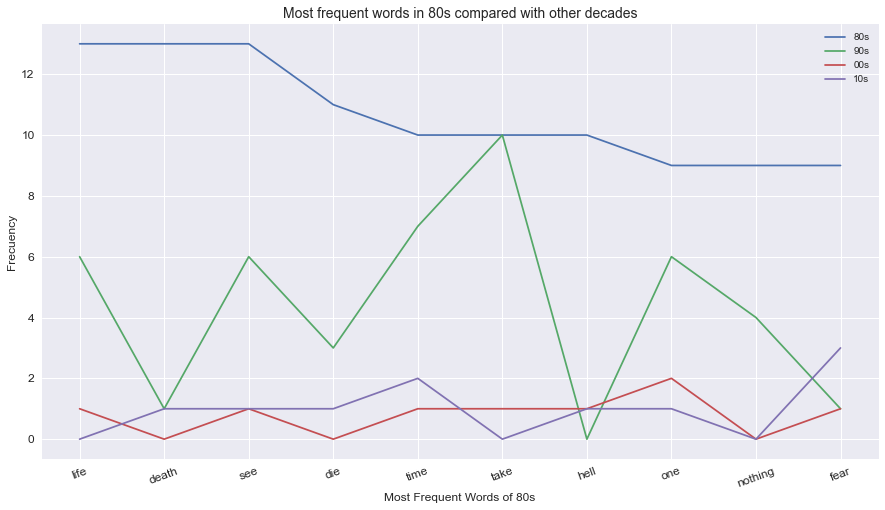

In [15]:
plot_freq_words(vect_words,'80s',10)

In [16]:
#Function that display the most common words used per decade
def unique_decade_words(df,decade,n_words):
    periods = []
    unique_words = []
    top_words = df.sort_values([decade],ascending=False).head(n_words).reset_index(drop=True)

    for d in top_words.columns[1:]:
        if d != decade:
            periods.append(d)

    for i in top_words.index:
        if top_words[periods[0]].iloc[i]<top_words[decade].min():
            if top_words[periods[1]].iloc[i]<top_words[decade].min():
                if top_words[periods[2]].iloc[i]<top_words[decade].min():
                    unique_words.append(top_words['words'].iloc[i])
    return unique_words

In [17]:
unique_decade_words(vect_words,'80s',10)

['life', 'death', 'see', 'die', 'time', 'hell', 'one', 'nothing', 'fear']

In [18]:
#Sentiment Analysis using VADER Sentiment Intensinty Model

#Create lists to store the different scores for each word
negative = []
neutral = []
positive = []
compound = []

#Initialize the model
sid = SentimentIntensityAnalyzer()

#Iterate for each row of lyrics and append the scores
for i in df.index:
    scores = sid.polarity_scores(df['lyric'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

#Create 4 columns to the main data frame  for each score 
df['negative'] = negative
df['neutral'] = neutral
df['positive'] = positive
df['compound'] = compound

In [19]:
df.head()

,artist,title,album,decade,year,date,lyric,words,negative,neutral,positive,compound
0,Metallica,Nothing Else Matters,Metallica,90s,1991,1991-08-12,so close no matter how far couldn't be much mo...,"[close, matter, far, much, heart, forever, tru...",0.187,0.746,0.067,-0.9696
1,Metallica,One,...And Justice for All,80s,1989,1989-08-25,i can't remember anything can't tell if this i...,"[cant, remember, anything, tell, true, dream, ...",0.184,0.635,0.181,-0.7078
2,Metallica,Enter Sandman,Metallica,90s,1991,1991-08-12,say your prayers little one don't forget my so...,"[say, prayer, little, one, forget, son, includ...",0.097,0.730,0.174,0.9413
3,Metallica,Master of Puppets,Master of Puppets,80s,1986,1986-03-03,end of passion play crumbling away i'm your so...,"[end, passion, play, crumbling, away, im, sour...",0.136,0.720,0.145,-0.0341
4,Metallica,The Unforgiven,Metallica,90s,1991,1991-10-28,new blood joins this earth and quickly he's su...,"[new, blood, join, earth, quickly, he, subdued...",0.153,0.810,0.036,-0.9890


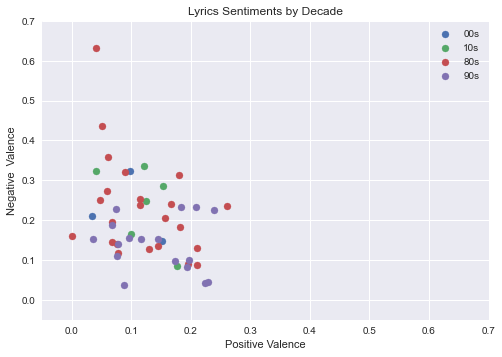

In [20]:
for name, group in df.groupby('decade'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend(fontsize=10)

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])

plt.title("Lyrics Sentiments by Decade")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

In [21]:
means_df = df.groupby(['decade']).mean()
means_df 

,year,negative,neutral,positive,compound
decade,,,,,
00s,2006.333333,0.227333,0.679000,0.093667,-0.542633
10s,2016.000000,0.240667,0.640333,0.119000,-0.660300
80s,1985.913043,0.229043,0.653609,0.117348,-0.504222
90s,1994.941176,0.139471,0.718118,0.142471,-0.206776


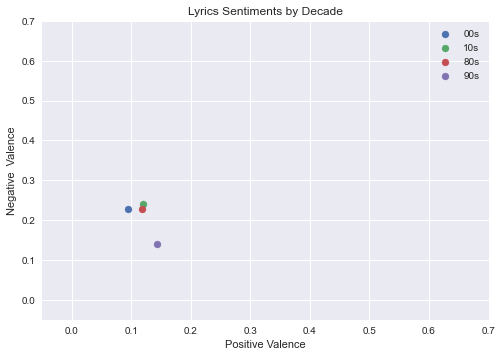

In [22]:
for name, group in means_df.groupby('decade'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend()

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("Lyrics Sentiments by Decade")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')

plt.show()